# BH binary formation channels


Dataset at solutions/formationchannels.npy .

1. Load this file (np.load) and complete a quick exploration of the data. How many modes do you think you see?
2. Take some time to explore sklearn.mixture.GaussianMixture. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the fit method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.
3. Complete the fit 10 times with *N* = 1,..., 10 Gaussians.
4. For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot *N*
 vs AIC: which model is preferred
6. Plot the preferred solution on top of the input data. You should get a very nice fit!
7. Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset.?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

Text(0.5, 1.0, 'Histogram of the BH masses')

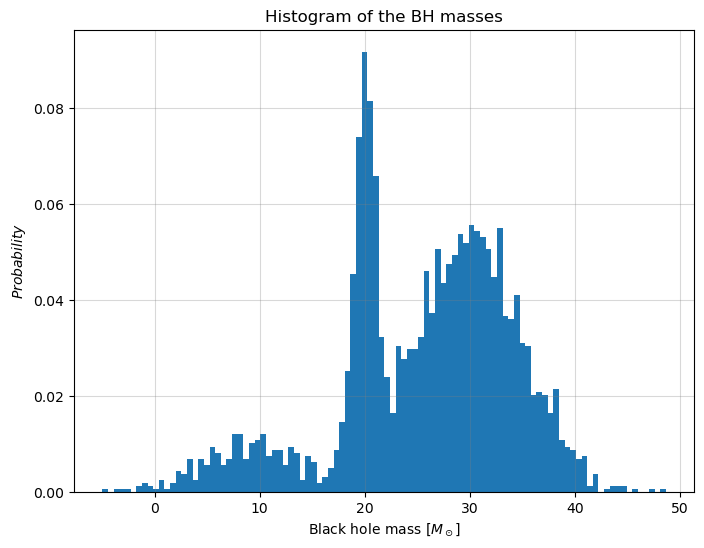

In [4]:
#I take the data from the file
data = np.load('formationchannels.npy')

#Plot them in histogram
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.hist(data, bins = 100, density = True)
ax.grid(alpha=0.3, c = 'grey')
ax.set_xlabel('Black hole mass $[M_\odot]$')
ax.set_ylabel('$Probability$')
ax.set_title('Histogram of the BH masses')

## AIC

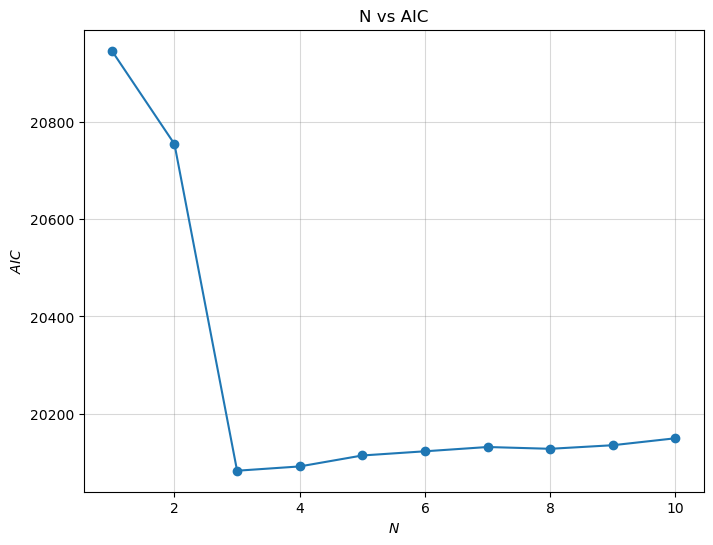

In [5]:
#Evaluation of AIC to find the best fit (changing the number of gaussians n) 
aic=[]   
for i in range(1, 11):
    gm = GaussianMixture(n_components=i, random_state=0).fit(data)
    aic.append(gm.aic(data))

n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#Plot AIC vs N 
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.gca()
ax1.grid(alpha=0.3, c = 'grey')
ax1.set_xlabel('$N$')
ax1.set_ylabel('$AIC$')
ax1.set_title('N vs AIC')
ax1.plot(n, aic, marker = 'o')

## Plot Gaussian Mixture with the best N

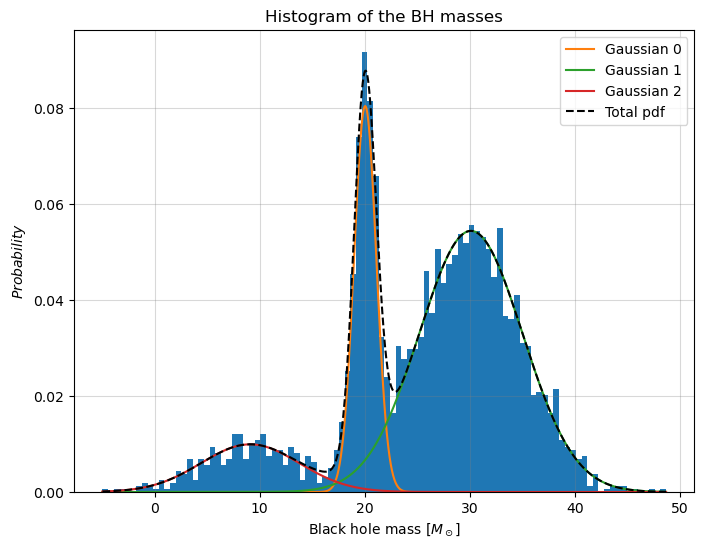

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.hist(data, bins = 100, density = True)
ax.grid(alpha=0.3, c = 'grey')
ax.set_xlabel('Black hole mass $[M_\odot]$')
ax.set_ylabel('$Probability$')
ax.set_title('Histogram of the BH masses')

N = n[np.argmin(aic)] #Number of Gaussian components that correspond to the smallest AIC

#Representation of a Gaussian mixture model probability distribution. 
#This class allows to estimate the parameters of a Gaussian mixture distribution.
gm = GaussianMixture(n_components=N, random_state=0).fit(data)

x = np.arange(np.min(data), np.max(data), 0.01) #X axis

y= []

for i in range(N):
    y.append(norm.pdf(x, gm.means_[i], np.sqrt(gm.covariances_[i][0]))*gm.weights_[i]) 
    ax.plot(x, y[i], label ='Gaussian '+str(i)) #Rappresentation of the Gaussian on the histogram 
    
somma = sum(y)

ax.plot(x, somma, color = 'black', linestyle='--', label = 'Total pdf')
ax.legend()